# Assignment 1
## Author: Serhii Korzh (802172)

In [1]:
# Imports
import altair as alt
from altair import expr, datum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

alt.renderers.enable('altair_saver', fmts=["html", "svg"]);

## Exercise 1

![U.S. economy at glance](img/ex1-a.png)

**(a)** *Analyse the visualisation in Figure 1, starting from Tufte’s principles. List at least 4 items that contradict these good design principles.*

1. **Chartjunk.** The whole left part of the graph is filled with the flag of the USA. While it is definitely a catchy design, the flag does not serve any purpose rather than indicating that this is data concerning the USA.
2. **Design variation mixed with data variation.** The graphic shows many different variables on one plot, yet, the scales and units of both the Y and X axes are different for different variables.
3. **Unclear and ambigous labelling of data.** Labels are placed too far from the actual data, and, given the number of the shown metrics, it is hard to see which graph depicts which metric. Additionally, the graph points are labelled inconsistently, with some "bumps" in the data not labelled at all (e.g. in metrics #2 and #7). Since there are no axes, it is very hard to infer the actual values. Moreover, there is no information on the initial values and dates of the metrics.
4. **Suboptimal use of data-ink.** Due to chartjunk and other design decisions (e.g. uninformative label indices instead of actual labels), the data-ink ratio is low. Furthermore, there is a lot of unnecesary data ink (like the thick graph lines).


In [ ]:
# Data definition
unemp = pd.DataFrame({
    'val': [.068, .081, .085],
    'date': ['2008-11-01', '2009-02-01', '2009-03-01'],
})

indices = pd.DataFrame({
    'val': [-0.017, 0.004, -0.001,  -0.027, 0.001, -0.012,  -0.074, -0.001, 0.005],
    'date': ['2008-11-01', '2009-02-01', '2009-03-01', '2008-11-01', '2009-02-01', '2009-03-01', '2008-11-01', '2009-02-01', '2009-03-01'],
    'index': ['Consumer Price Index (season. adj.)', 'Consumer Price Index (season. adj.)', 'Consumer Price Index (season. adj.)', 'Producers Price Index (season. adj.)', 'Producers Price Index (season. adj.)', 'Producers Price Index (season. adj.)', 'U.S. Import Price Index (not season. adj.)', 'U.S. Import Price Index (not season. adj.)', 'U.S. Import Price Index (not season. adj.)']
})

prod = pd.DataFrame({
    'val': [0.026, -0.006, 0.008],
    'date': ['2008-01-01', '2008-10-01', '2009-01-01']
})

**(b)** Give a suggestion for a better visualisation for the same task, using the data shown in Figure 1, and explain your design choices. For a full mark you should provide an image (e.g. drawing, even by hand) and an argumentation, why the proposal is better than the original.


In my opinion, this data is best visualised when split apart, as not all of the metrics can be relateable.

For example, this is unemployment rate data visualised on its own:

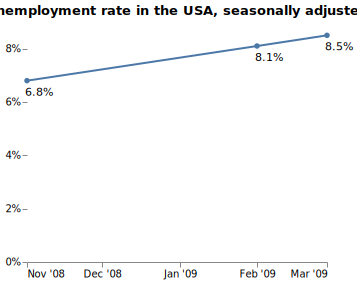

In [3]:
ch = alt.Chart(unemp).mark_line(point=True).encode(
    alt.X('yearmonth(date)', scale=alt.Scale(zero=False), title=None, axis=alt.Axis(format='%b \\\'%y', domain=True, grid=False)),
    alt.Y('val:Q', title=None, axis=alt.Axis(format='%', grid=False, domain=False)),
).properties(
    title='Unemployment rate in the USA, seasonally adjusted',
    width=300,
    height=240
)


text = ch.mark_text(
    align='center',
    baseline='bottom',
    dy=17,
    dx=12
).encode(
    text=alt.Text('val:Q', format='.1%')
)

(ch + text).configure_view(
    stroke=None
)

The grid lines and borders can be removed (to maximise data-ink). Labels were added for more clarity, and the Y scale is left for more precise analysis and ensuring the scale begins at 0%. In a similar manner, we can visualise metrics #2 and #3.

Metrics #4, #5, and #6 are all indices related to economic output / growth. Thus we can group them for comparison:

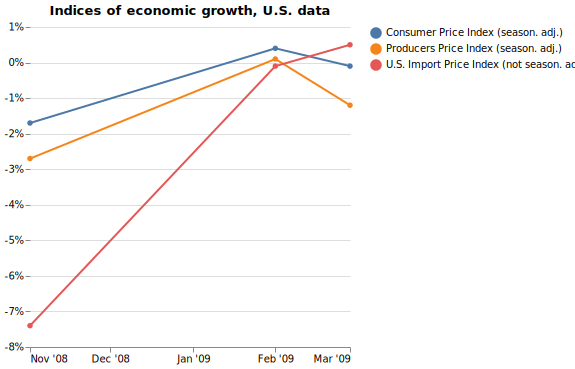

In [4]:
alt.Chart(indices).mark_line(point=True).encode(
    x=alt.X('yearmonth(date)', title=None, axis=alt.Axis(format='%b \\\'%y', domain=True, grid=False)),
    y=alt.Y('val:Q', title=None, axis=alt.Axis(format='%', grid=True, domain=False)),
    color=alt.Color('index', title=None, legend=alt.Legend(labelLimit=200)),
).configure_view(
    stroke=None
).properties(
    title='Indices of economic growth, U.S. data',
    width=320,
    height=320
)

The horisontal grid lines are added to allow for a more precise comparison.

The productivity metric (#7) is also to be visualised separately, as it is measured quarterly:

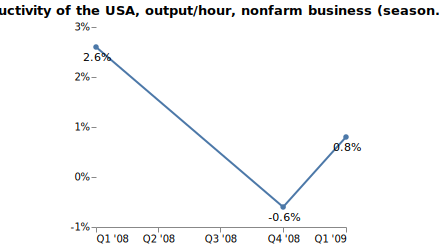

In [5]:
ch = alt.Chart(prod).mark_line(point=True).encode(
    alt.X('yearquarter(date):T', scale=alt.Scale(zero=False), title=None, axis=alt.Axis(format='Q%q \\\'%y', domain=True, grid=False)),
    alt.Y('val:Q', title=None, axis=alt.Axis(format='%', grid=False, domain=False)),
).properties(
    title='Productivity of the USA, output/hour, nonfarm business (season. adj.)',
    width=250,
    height=200
)

text = ch.mark_text(
    align='center',
    baseline='bottom',
    dy=16,
    dx=1
).encode(
    text=alt.Text('val:Q', format='.1%')
)

(ch + text).configure_view(
    stroke=None
)

## Exercise 2

I chose the following graphic from
https://www.livescience.com/coronavirus-updates-united-states.html

![Coronavirus updates in the U.S.](img/ex2.jpg)

Live Science is a US-based commercial science news service. The visualisation is from a recent article regarding the SARS-CoV-2 outbreak in the US. I personally believe the visualisation is poorly designed because of the following:
1. **The graphic is ambiguous.** There is no information regarding what those colours actually mean. I assume it is showing where there was at least 1 confirmed case of SARS-CoV-2 as of March 11. However, it is not mentioned anywhere (including the supporting article).
2. **The map presents little actual information.** Given the assumption I made in the previous point, the whole graphic is basically saying: almost all of the states have at least 1 infected person. It gives no information about the distribution of cases or deaths, so the whole visualisation can be replaced with the previous statement, the number of cases, and the number of deaths.

## Exercise 3

**(a)**
For Donald, I would propose the following graphic, showing the apparent decrease in temerature on land over the years:

In [6]:
# Read data
df = pd.read_csv('data/climate.data', header=0, names=['Month', 'Year', 'Globe', 'Land', 'Ocean'])
df['Day'] = 1
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
new_df = pd.melt(df, id_vars=['Date', 'Year'], value_vars=['Land', 'Ocean', 'Globe'], var_name='Loc', value_name='Temp')

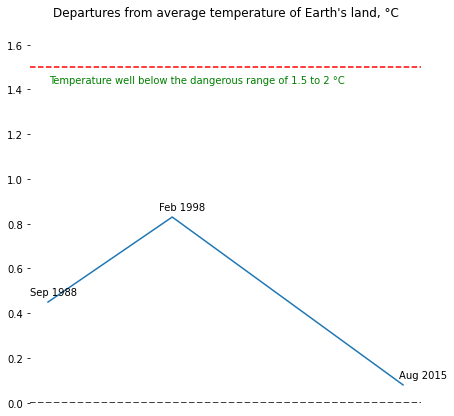

In [7]:
betw = lambda x, y: df[df['Year'].between(x,y)]
lloc = 'Land'
graph_idxs = [betw(1974, 1990)[lloc].idxmax(), betw(1995, 2000)[lloc].idxmax(), + betw(2015, 2020)[lloc].idxmin()]

f, ax = plt.subplots(figsize=(7, 7))
data = df.loc[graph_idxs]
y_min, y_max = (0, 1.7)
x_min, x_max = (data['Date'].min().timestamp(), data['Date'].max().timestamp())
ax = sns.lineplot(x='Date', y='Land', data=data)
ax.set_ylim(y_min, y_max)


x_coord = lambda x: (x[1]['Date'].timestamp() - x_min) / (x_max - x_min + 50000000)
y_coord = lambda x: (x[1]['Land'] - y_min) /(y_max - y_min)
annot = lambda x: ax.annotate(
    x[1]['Date'].month_name()[:3] + " " + str(x[1]['Year']), 
    xy=(x_coord(x), y_coord(x)), 
    xycoords="axes fraction",
    xytext=(0,15), textcoords="offset points",
    ha="left", va="top"
)
[annot(x) for x in df.loc[graph_idxs].iterrows()]
sns.despine(bottom = True, left = True)
ax.axhline(1.5, ls='--', color='red')
ax.text(s='Temperature well below the dangerous range of 1.5 to 2 °C', y=1.43, x=726000, color='green')
ax.axhline(-0.003, ls='--', color='black')

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Departures from average temperature of Earth\'s land, °C')
plt.show()

The "trick" used to achieve this effect is to cherry-pick the data, ignoring the vital information lying between the picked data points. A dataset of 1400+ points was simplified into 3 values that seem to play in our favor. 

**(b)** 

Fortunately for Bernie, no dirty tricks are needed in order to make a visualisation look convincing for proving his argument. The data does show an increase in temperature, but we can help him visualise what could this mean for our future:

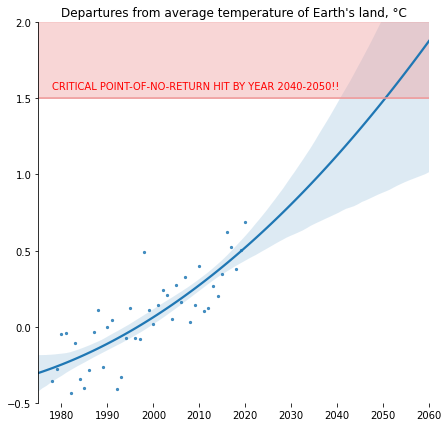

In [8]:
# plt.xlim(1972, 2050)
f, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(1975, 2060)
ax.set_ylim(-0.5,2)
lloc = 'Land'
data = df['Land'].groupby(df['Year']).mean()
sns.despine(bottom = True, left = False, right=True)

ax = sns.regplot(x=data.index, y=data, ax=ax, scatter_kws={"s": 5}, order=2, ci=80, truncate=False)
ax.axhline(1.5, ls='-', color='#EF9A9A')
ax.axhspan(2, 1.5, color='#EF9A9A', alpha=0.4)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Departures from average temperature of Earth\'s land, °C')
ax.text(s='CRITICAL POINT-OF-NO-RETURN HIT BY YEAR 2040-2050!!', y=1.56, x=1978, color='red')
plt.show()

Here, a yearly averages are calculated (represented by points), and a 2nd-order polynomial was fitted to the data in order to extrapolate the trend into the future. A somewhat loose confidence interval of 80% was added to show that drastic changes might come even faster than we expect.

**(c)** 

The Lie factor of cherry-picking is hard to estimate, as the distortion is not visual, but rather in the design of the data itself. for the Donald visualisation, if we say that the perceived difference between the avg. temperature in 1988 and 2015 is -0.4 °C, while the actual change is +0.6 °C, we can say that the Lie factor is -2/3. The negative sign shows that the graphic makes the trend go in an opposite direction from the actual one.

For the visualisation of Bernie, the Lie factor is technically 0. However, there is an underlying assumption that our data non-linearily. If we fit a line to the data, the projected apocalypsis of 1.5 °C is already in 2080, whereas the second-order curve projects it to be around year 2050. If the assumption that a linear fit is the proper was of extrapolating data, we can calculat the ratio of the increase of temperature between 2020 and 2050 of our fit and of a linear fit, and the resulting number 1/0.5 = 2 would be our Lie Factor. However, such assumption cannot be made.

**(d)**

As for Maija, I have prepared a visualisation of the data, comparing all three locations of the measurements (Globe, Ocean, Land):

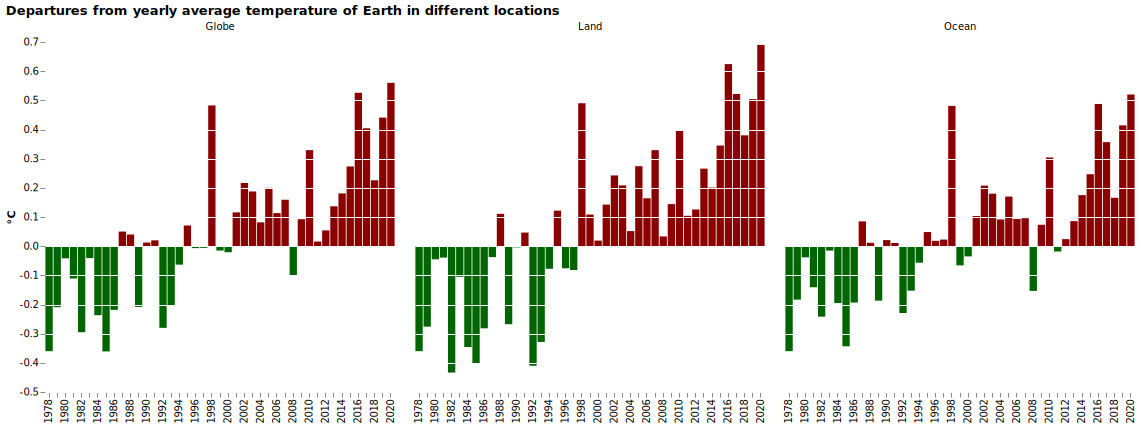

In [9]:
real_data = new_df.groupby(['Year', 'Loc']).mean().reset_index()
alt.Chart(real_data).mark_bar().encode(
    x=alt.X('Year:O', title=None, axis=alt.Axis(domain=False)),
    y=alt.Y('Temp:Q', title='°C', axis=alt.Axis(domain=False, zindex=1, gridColor='white')),
    facet=alt.Facet('Loc', columns=3, title=None),
    color=alt.condition(
        alt.datum.Temp > 0,
        alt.value("darkred"),
        alt.value("darkgreen"),
    )
).configure_view(
    stroke=None
).properties(
    title='Departures from yearly average temperature of Earth in different locations',
    
    width=350,
    height=350
)

I decided to create a bar plot, as it would allow to visualise how a yearly average differs from the mean the data is centered to (I do not actually know which data was used to zero-center the dataset).
Following Tufte's principles, the visualisation presents the data reasonably well (without distortions), and the data-ink is maximised (within reason). The grid lines are omitted. Instead, white marks are added to the bars. the plot frame is also removed. the scales are chosen so that not to clutter the graphic. Color is used within reason, namely, to show the direction of deviation from 0, making the general trend of increasing temperature visually clear.

## Exercise 4

Generated by `seaborn.pairplot`

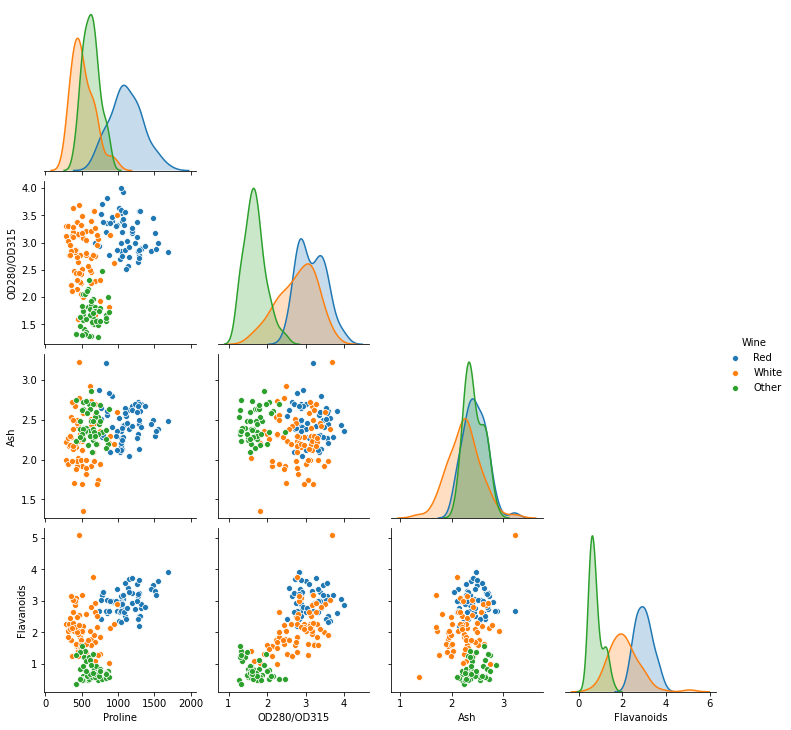

In [10]:
wine_attrs_text = """1. Alcohol
2. Malic acid
3. Ash
4. ash Alcalinity
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315
13. Proline"""

wine_attrs = ['Wine'] + list(map(lambda x: x.split('.')[1].strip(), wine_attrs_text.split('\n')))

wine_data = pd.read_csv('data/wine.data', names=wine_attrs).replace(
    {'Wine': {1: 'Red', 2: 'White', 3: 'Other'}}
)

wine_subset = wine_data[
    ["Wine","Proline","OD280/OD315","Ash","Flavanoids"]
]
ax = sns.pairplot(wine_subset, hue="Wine", corner=True)
# ax.savefig('img/ex4.png')